# Task - 3

### Name - Rutuja Vedpathak

### EMAIL SPAM DETECTION 

### We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of emailthat is sent to a massive number of users at one time, frequently containing crypticmessages, scams, or most dangerously, phishing content.



### In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s getstarted!

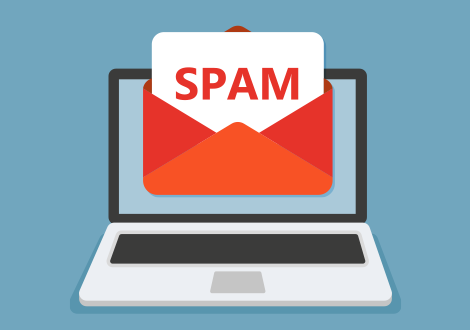

In [13]:
from IPython import display
display.Image(r"C:\Users\vedpa\Downloads\1_byZ8tSrUasgfCvHU0a315Q.png")

In [14]:
#Import python liabraries from scikit-learn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score

In [17]:
#Load dataset
df="C:\Users\vedpa\OneDrive\Documents\spam.csv",encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [18]:
#Check column list present in df
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [19]:
#check descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
#check the number of rows and columns present in df
print('rows---->',df.shape[0])
print('columns---->',df.shape[1])

rows----> 5572
columns----> 5


In [21]:
#Lets see null value count in df
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [22]:
df.isnull().mean()*100  #check the percentage of null value

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

**As we can see there are huge number of missing entries in Unnamed:2,Unnamed:3,Unnamed:4 col i.e more than 99%.So we should have to remove these column**

In [23]:
df.drop(columns=df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)

In [24]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
df.shape

(5572, 2)

In [26]:
#Rename columns names for easy to understand, we can also use df.rename
df.columns=['spam/ham','sms']

In [27]:
#Convert the text data into numerical form
df.loc[df['spam/ham'] == 'spam', 'spam/ham',] = 0
df.loc[df['spam/ham'] == 'ham', 'spam/ham',] = 1

In [28]:
df

,spam/ham,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [29]:
#Devide x and y parameters to train model
x=df.sms
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object

In [30]:
y =df['spam/ham']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5572, dtype: object

In [31]:
#Devide the whole dataset into training and testing set for model training
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [33]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(5572,)
(4457,)
(1115,)


In [34]:
xtrain,xtest

(3075    Mum, hope you are having a great day. Hoping t...
 1787                           Yes:)sura in sun tv.:)lol.
 1614    Me sef dey laugh you. Meanwhile how's my darli...
 4304                Yo come over carlos will be here soon
 3266                    Ok then i come n pick u at engin?
                               ...                        
 789                          Gud mrng dear hav a nice day
 968             Are you willing to go for aptitude class.
 1667    So now my dad is gonna call after he gets out ...
 3321    Ok darlin i supose it was ok i just worry too ...
 1688                     Nan sonathaya soladha. Why boss?
 Name: sms, Length: 4457, dtype: object,
 2632                       I WILL CAL YOU SIR. In meeting
 454     Loan for any purpose å£500 - å£75,000. Homeown...
 983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
 1282    Ever green quote ever told by Jerry in cartoon...
 4610                                  Wat time Ì_ finish?
               

In [35]:
ytrain,ytest

(3075    1
 1787    1
 1614    1
 4304    1
 3266    1
        ..
 789     1
 968     1
 1667    1
 3321    1
 1688    1
 Name: spam/ham, Length: 4457, dtype: object,
 2632    1
 454     0
 983     1
 1282    1
 4610    1
        ..
 4827    1
 5291    1
 3325    1
 3561    1
 1136    0
 Name: spam/ham, Length: 1115, dtype: object)

**As we know that,machine learning algorithms only performs well with respect to numbers,so we need to convert all the text data into numbers.To do so I will use TfidfVectorizer techinque from feature_extraction of sklearn.**

In [36]:
feat_vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
feat_vect

TfidfVectorizer(stop_words='english')

In [37]:
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')

In [38]:
xtrain_vec =feat_vect.fit_transform(xtrain)

In [39]:
xtest_vec =feat_vect.transform(xtest)

In [40]:
print(xtrain)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: sms, Length: 4457, dtype: object


In [41]:
xtrain_vec

<4457x7510 sparse matrix of type '<class 'numpy.float64'>'
	with 34758 stored elements in Compressed Sparse Row format>

In [42]:
print(xtrain_vec)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [43]:
print(xtest_vec)

  (0, 6007)	0.537093591660729
  (0, 4294)	0.5159375448718375
  (0, 1537)	0.667337188824809
  (1, 7222)	0.23059492898537967
  (1, 6599)	0.14954692788663673
  (1, 6579)	0.2733682162643466
  (1, 5501)	0.28671640581392144
  (1, 5347)	0.2733682162643466
  (1, 5250)	0.28671640581392144
  (1, 4045)	0.250549335510249
  (1, 3365)	0.28671640581392144
  (1, 3300)	0.37297727661877506
  (1, 2899)	0.1385795841356552
  (1, 602)	0.28671640581392144
  (1, 520)	0.19344507865262492
  (1, 321)	0.28671640581392144
  (1, 43)	0.24547458936715758
  (1, 1)	0.21260233518669946
  (2, 6701)	0.30969080396105314
  (2, 6648)	0.3410121739015846
  (2, 4070)	0.44361668503137164
  (2, 2941)	0.6068486133983123
  (2, 2939)	0.47195476517479323
  (3, 7101)	0.29334330258175106
  (3, 6746)	0.2031810874151213
  :	:
  (1111, 7415)	0.4945753828645536
  (1111, 6848)	0.39685462025643714
  (1111, 6093)	0.4671914311419049
  (1111, 3259)	0.4477622081928626
  (1111, 2458)	0.42325261089251354
  (1112, 4903)	0.4770390302498559
  (1112, 

In [44]:
logi=LogisticRegression()

In [45]:
logi.fit(xtrain_vec,ytrain)

LogisticRegression()

In [46]:
logi.score(xtrain_vec,ytrain)

0.9661207089970832

In [47]:
logi.score(xtest_vec,ytest)

0.9623318385650225

In [48]:
pred_logi=logi.predict(xtest_vec)
pred_logi

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
accuracy_score(ytest,pred_logi)

0.9623318385650225

In [51]:
confusion_matrix(ytest,pred_logi)

array([[114,  41],
       [  1, 959]], dtype=int64)

In [52]:
print(classification_report(ytest,pred_logi))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       155
           1       0.96      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



### finish